In [4]:
# 1: Decision Trees
# importing scikit-learn along with tools such as
# datasets for the Iris flower dataset
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# loading the Iris flower dataset
dataset = datasets.load_iris()

# fitting a Classification and Regression Tree (CART)
# model to the Iris flower dataset
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

# making predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# this is printing the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [5]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.8\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="X[3] <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="X[0] <= 6.95\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 2\\nvalue = [0,

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

iris = load_iris()

dt = DecisionTreeClassifier(random_state=0, max_depth=5)
dt = dt.fit(iris.data, iris.target)
r = export_text(dt, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



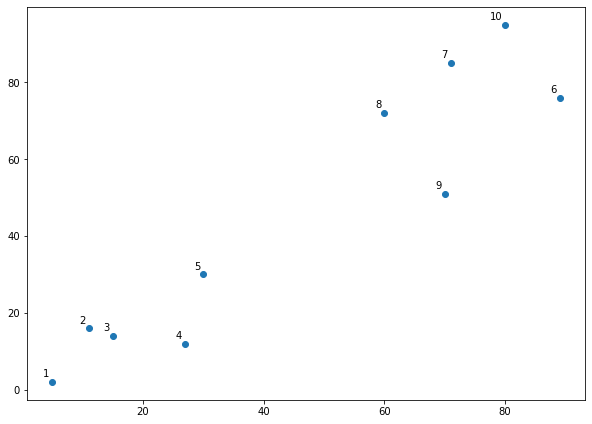

In [1]:
# 2: Clustering/Biclustering
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[5, 2],
             [11, 16],
             [15, 14],
             [27, 12],
             [30, 30],
             [89, 76],
             [71, 85],
             [60, 72],
             [70, 51],
             [80, 95],])

labels = range(1, 11)
plt.figure(figsize = (10, 7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0], X[:,1], label = 'True Position')

for label, x, y in zip(labels, X[:,0], X[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-3, 3),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

In [4]:
from sklearn.manifold import LocallyLinearEmbedding as lle
lle = lle(n_neighbors = 5, n_components = 2)
X_transformed = lle.fit_transform(X)

C:\Users\jonny\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


lle: 0.68 sec
t-SNE: 19 sec
PCA: 0.003 sec


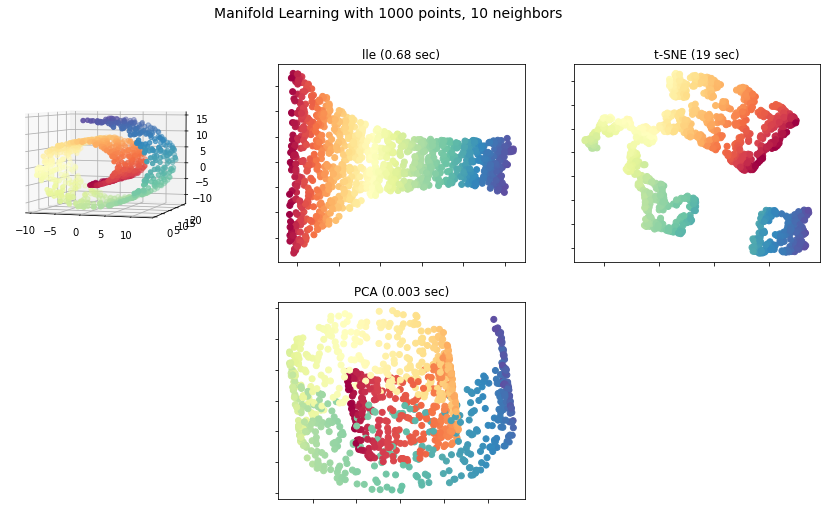

In [6]:
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
Axes3D

n_points = 1000
X, color = datasets.make_swiss_roll(n_points, random_state = 0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize = (15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
            % (1000, n_neighbors), fontsize = 14)

ax = fig.add_subplot(231, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = color, cmap = plt.cm.Spectral)
ax.view_init(4, -72)

lle = partial(manifold.LocallyLinearEmbedding,
            n_neighbors, n_components, eigen_solver = 'auto')
methods = OrderedDict()
methods['lle'] = lle(method = 'standard')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init = 'pca',
                                random_state=0)
methods['PCA'] = PCA(n_components=2)

for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, 2 + i+(i>1))
    ax.scatter(Y[:, 0], Y[:, 1], c = color, cmap = plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()